# Milestone 1 - Phase 1

# 1. Perkenalan

Nama : `Evita Ardhiya Ramadhani`, Batch: `11`
Query dataset:

> SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, 
pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 21989

Problem: Membuat model Classification untuk memprediksi klasifikasi default_payment_next_month menggunakan dataset credit card default.

Assignment Objectives:
- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

# 2. Import Library

Import library yang dibutuhkan dalam pengerjaan assigment seperti untuk load data, visualisasi, pembuatan model, evaluasi model dan sebagainya.

In [1]:
# Import Libraries load data 
import pandas as pd 
import numpy as np 

# library untuk plot
import matplotlib.pyplot as plt
import seaborn as sns

# Split data train-set dan test-set
from sklearn.model_selection import train_test_split 

# handling outliers
from feature_engine.outliers import Winsorizer

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# model definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# 3. Data Loading

Data loading berfungsi untuk load data yang akan digunakan dan diproses pada assigment. Data load menggunakan pandas berupa cek info, describe dan persiapan data lainnya.

Pertama, load data credit_card_default

In [2]:
# Load data
data = pd.read_csv('h8dsft_P1M1_Evita_Ardhiya_Ramadhani.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Pada dataset, tipe data yang ditampilkan adalah numerik dalam artian angka tetapi sebenarnya angka-angka tersebut mewakili kategori dari data.
Berikut adalah penjelasan angka yang mewakiliki kategori tiap kolom:
- limit_balance (jumlah limit yang diberikan): dalam range dollar
- sex (gender): 1 = male, 2 = female
- education_level (pendidikan): 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
- marital_status (status pernikahan): 1=married, 2=single, 3=others
- age (usia): usia dalam range tahun
- Pay 0,2,3,4,5,6 (Status pembayaran dari bulan September-April 2005 berurut-turut): -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above
- bill_amt 1,2,3,4,5,6 (Jumlah tagihan pada bulan September-April 2005 berurut-turut): tagihan dalam range dollar
- pay_amt 1,2,3,4,5,6 (Jumlah pembayaran sebelumnya bulan September-April 2005 berurut-turut): pembayaran sebelumnya dalam range dollar
- default_payment_next_month (Default payment): 1=yes, 0=No

Sebelum dataset yang asli digunakan sebaiknya dilakukan duplicate dataset untuk tetap menyimpan dataset yang asli jika sewaktu-waktu dibutuhkan.

In [3]:
# Duplicate dataset
data_copy = data.copy()

Menampilkan head dan tail dari data set.

In [4]:
# 10 baris teratas (head) dari dataset
data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
5,20000.0,1,1,2,29.0,0.0,0.0,2.0,0.0,0,...,17368.0,17959.0,19023.0,3170.0,0.0,1000.0,1000.0,3000.0,0.0,0
6,220000.0,1,1,2,38.0,0.0,0.0,0.0,0.0,0,...,198681.0,202479.0,206221.0,7705.0,9656.0,7189.0,7404.0,7490.0,7517.0,0
7,50000.0,1,1,1,42.0,0.0,0.0,0.0,0.0,0,...,29664.0,29057.0,29083.0,1850.0,1507.0,1100.0,1200.0,1116.0,2900.0,0
8,170000.0,1,1,1,41.0,0.0,0.0,0.0,0.0,0,...,76149.0,84474.0,92400.0,3200.0,6000.0,5000.0,10000.0,10000.0,780.0,0
9,50000.0,2,1,2,24.0,0.0,0.0,2.0,0.0,0,...,32140.0,32216.0,31482.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0,0


In [5]:
# 10 baris terakhir (tail) dari dataset
data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,160000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2941.0,0.0,0.0,0.0,0.0,0.0,0
2956,260000.0,2,2,2,26.0,-1.0,-1.0,-2.0,-2.0,-2,...,-920.0,-1236.0,-1552.0,288.0,1236.0,316.0,316.0,316.0,316.0,0
2957,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2958,90000.0,2,1,1,44.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2959,80000.0,2,2,2,45.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,83750.0,0.0,0.0,0.0,0.0,0.0,0
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Untuk melihat jenis tipe kolom, bisa menggunakan .info. Selain itu dapat dilihat nilai missing value dari tiap kolom.

In [6]:
# cek info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Data info menunjukkan bahwa semua kolom bertipe numerik, ada kolom yang angka mewakiliki nilai kategori ada juga angka yang nilainya mewakili yang sebenarnya seperti limit_balance, age, bill_amount, dan pay_amount. Total kolom ada 24 kolom dan 2965 baris. Seharusnya jumlah baris yang ditujukan pada assigment adalah 21989 (tahun lahir penulis x batch) tetapi dalam BigQuery jumlah rows yang tersedia hanya 2965. 

Untuk mengetahui info statistik dataset dapat menggunakan .describe

In [7]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


age rata-rata yang mengajukan kartu kredit adalah 35.2. sedangkan usia minimal 21 tahun. Limit balance yang diberikan dari 10000 hingga 800000 dollar. Kita akan mengecek apakah pemberian limit balance dipengaruhi oleh age, sex atau yang lainnya.

Selanjutnya, mengubah nama kolom 'sex' menjadi 'gender'.

In [8]:
data = data.rename(columns={'sex': 'gender',})
data

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


# 4. Exploratory Data Analysis (EDA)

## 4.1 Heatmap korelasi fitur dan target

Untuk mengecek korelasi antara fitur dan target, bisa menggunakan headmap atau pair plot. Tujuannya adalah untuk meilihat fitur mana yang memiliki pengaruh panling tinggi terhadap target dan mengecek untuk setiap fitur bersifat independent.

Sebelum membuat plot, sebaiknya beberapa kolom dipisah terlebih dahulu karena jika dilakukan dalam satu plot kolom terlalu banyak dan hasil plotnya tidak terlalu jelas dan membingungkan.

Pertama, mengecek korelasi antara limit_balance, gender, education_level, marital_status, age, pay_0 - pay_6 dan default_payment_next_month. 

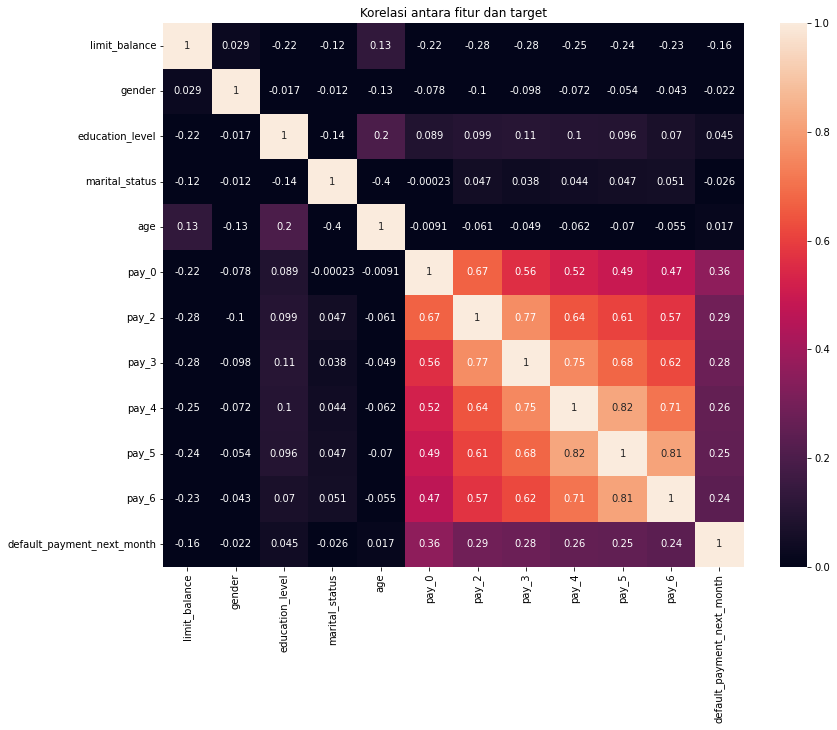

In [9]:
# siapkan kolom yang akan digunakan
corr1 = data[['limit_balance', 'gender', 'education_level', 'marital_status', 'age',
                'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']].corr()

# buat heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(corr1, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()

Korelasi fitur payment status (pay) dengan default_payment_next_month semakin lama semakin megalami peningkatan (april ke september). Pada bulan april (pay_6) korelasi hanya 0.24 sedangakan pada bulan september (0.36).

Kedua, mengecek korelari antara bil_amt 1-6, pay_amt 1-6 dengan default_payment_next_month.

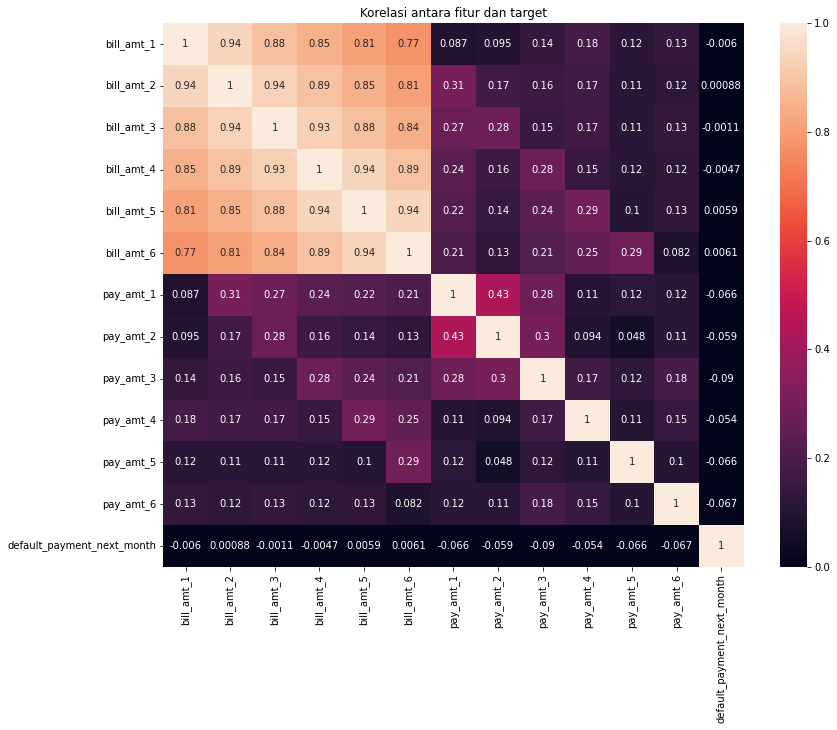

In [10]:
# siapkan kolom yang akan digunakan
corr2 = data[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
                'default_payment_next_month']].corr()

# buat heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(corr2, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()

Sebenarnya untuk bill_amt dan pay_amt tidak terlalu memiliki korelasi yang tinggi terhadap target tetapi tetap memperngaruhi target. Dapat dilihat juga bahwa pay 0 - pay 6, bill_amt dan pay_amt memiliki korelasi yang tinggi maka pada feature selection hanya satu saja yang akan digunakan agar tidak terjadi overfitting pada train.

## 4.2 Besar Limit balance

Penulis ingin mencari tahu, limit balance yang diberikan untuk customer itu pertimngannya berdasarkan apa saja apakah gender, education level, marital_status dan age. Jadi hal ini bisa menggunakan heatmap dan scatterplot

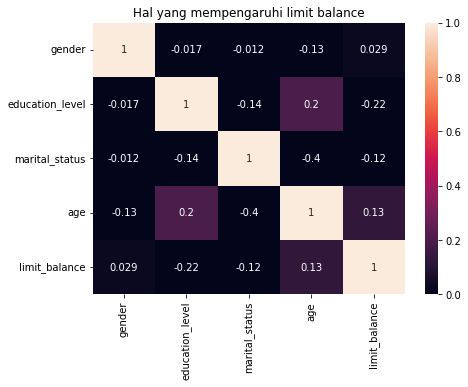

In [11]:
# membuat kolom yang akan digunakan pair plot
pair = data[['gender', 'education_level', 'marital_status', 'age', 'limit_balance']].corr()

# buat heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(pair, annot= True, vmin=0, vmax=1)
plt.title('Hal yang mempengaruhi limit balance')
plt.show()

Dari heatmap diatas, nilai korelasi yang paling mempengaruhi limit balance adalah age tetapi nilainya juga tidak terlalu tinggi. Selain itu bisa juga menggunakan scatterplot.

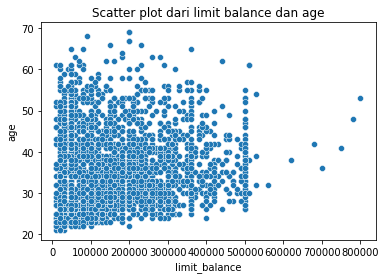

In [12]:
# scatterplot dan limit balance
sns.scatterplot(x='limit_balance',y='age',data=data)
plt.title('Scatter plot dari limit balance dan age')
plt.show()

Berdasarkan scatter plot, dapat dikatakan bahwa age dari customer memiliki sedikit pengaruh dalam penentuan limit balance yang diberikan.

## 4.3 Tingkat pendidikan yang paling banyak

Untuk mengecek tingkat pendidikan customer, pertama cek terlebih dahulu ada berapa tingkatan pedidikan.

In [13]:
# unique dari education level
data['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=int64)

karena pada dataset dijelaskan nilai dari kategori 5,6,0 = unknown, berarti kategori tesebut bisa digabungkan dengan kategori 4=others.

In [14]:
# gabungkan katgori
edu = (data.education_level == 5) | (data.education_level == 6) | (data.education_level == 0)
data.loc[edu, 'education_level'] = 4

Setelah digabungkan, lihat presentasi dari masing-masing kategori menggunakan pie-chart.

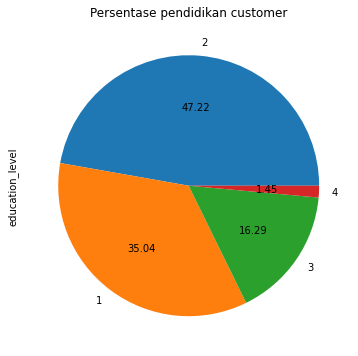

In [15]:
# pie char education
data['education_level'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Persentase pendidikan customer')
plt.show()

Jadi pendidikan yang paling banyak oleh kategori 2 yaitu university dengan persentase 47.22%.

## 4.4 Gender kategori

Dari customer male dan female, berapakah jumlah customer berdasarkan gender?

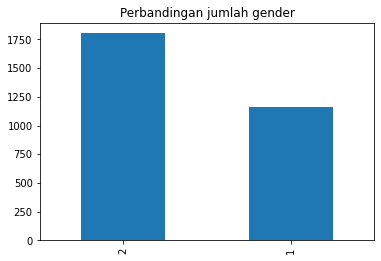

In [16]:
# barplot dari jumlah gender
data['gender'].value_counts().plot(kind='bar')
plt.title('Perbandingan jumlah gender')
plt.show()

berdasarkan barplot, customer yang paling banyak adalah female. Untuk alasan mengapa lebih banyak customer female dibandingan male yang menggunakan kartu credit mungkin karena female lebih sering berbelanja menggunakan kartu kredit agar lebih memudahkan pembayaran+dapat diskon sedangkan male biasanya tidak terlalu memerlukan kartu kredit dan menyukai pembayaran cash.

## 4.5 Perbandingan payment default 

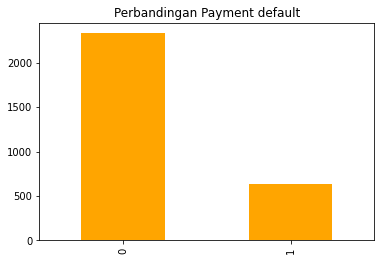

In [17]:
# perbadingan jumlah payment default
data['default_payment_next_month'].value_counts().plot(kind='bar', color='orange')
plt.title('Perbandingan Payment default')
plt.show()

Dari sini dapat diketahui bahwa data payment default untuk kategori 0 dan 1 memiliki jumlah yang sangat berbeda. oleh karena itu pada saat dimasukkan pada model machine learning kemungkinan untuk klasifikasi kategori 0 masih kurang baik karena datanya tidak cukup untuk model belajar.

# 5. Data Preprocessing

> Dalam data preprosessing dilakukan pesiapan sebelum data siap dimasukkan dalam model machine learning. Ada beberapa tahan yaitu, memisahkan data inference dan data train-test set dan melakukan scaling.

## 5.1 Splitting data inference dan data train-test set.

Data inference disini dapat diibaratkan dengan data baru nanti yang akan diuji setelah model ditrain dan di evaluasi. Data ini dapat diambil dari dataset awal diambil secara random. Random state yang digunakan berfungsi agar data random yang diambil memiliki hasil yang sama jika dijalankan ulang.

Split data inference dari dataset awal.

In [18]:
# mengambil 20 data untuk data inference
data_inf = data.sample(20, random_state= 17)

# menghapus data inference dari dataset
data_set = data.drop(data_inf.index)

# Reset index data-set
data_set.reset_index(drop=True, inplace=True)

# Reset index data inference
data_inf.reset_index(drop=True, inplace=True)

Setelah memisahkan data inference dari dataset awal, maka data_set dan data_inf memiliki index yang tidak beraturan karena data inference diambil secara random. Oleh karena itu dilakukan reset index untuk masing-masing data agar index kembali terurut.

In [19]:
# menampilkan data inference setelah diatur index
data_inf


,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [20]:
# menampilkan data-set
data_set

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2941,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2942,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2943,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Oke, data inferece telah dipisahkan dari dataset!

## 5.1 Split data train dan test dari dataset

Pertama definisikan fitur dan target yang akan digunakan untuk model. Fitur merupakan kolom yang nantinya akan mempengaruhi hasil pelabelan dari target. Fitur adalah X dan target adalah y.

Split data X dan y

In [21]:
# data fitur (X)
X = data_set.drop('default_payment_next_month', axis=1)

# data target
y = data_set['default_payment_next_month']

Setelah mendefinisikan fitur dan target, selanjutnya data dipisahkan untuk train dan test. Tujuannya adalah sebelum dilakukan prediksi model, model harus 'belajar' terlebih dahulu, nah 'belajar' tersebut dilakukan meggunakan data train. Untuk menguji model atau 'ujian' maka akan digunakan  data test. Pembagiannya data tidak direkomendasikan seimbang, baiknya lebih banyak train agar model banyak belajar. Jadi penulis membagi train 85% dan test 15%.

Split data train dan test.

In [22]:
# split train dan test dari fitur dan target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 17, test_size=0.15)

# tampilkan size dataset, train dan test
print('Size dataset:', data_set.shape)
print('Size X-Train:', X_train.shape)
print('Size X-Train:', y_train.shape)
print('Size X-Test:', X_test.shape)
print('Size X-Test:', y_test.shape)

Size dataset: (2945, 24)
Size X-Train: (2503, 23)
Size X-Train: (2503,)
Size X-Test: (442, 23)
Size X-Test: (442,)


jadi untuk dataset sebelum ditentukan fitur dan terget masi ada 24 kolom, setelah dipisah maka untuk fitur 23 kolom dan terget 1. 

## 5.3 Data Cleaning

Data cleaning merupakan proses mengecek missing value ataupun outliers. Untuk missing value sendiri harus dilakukan replacing ataupun di handle dengan cara lainnya sedangkan untuk outliers bisa tidak dihandle tetapi lebih baik dilakukan handle karena ada beberapa model machine learning yang sensitif terhadapnya.

Cek missing value masing-masing data.

In [23]:
# missing value dari masing-masing data
print('Missing value X-train:', X_train.isnull().sum().sum())
print('Missing value X-test:', X_test.isnull().sum().sum())
print('Missing value y-train:', y_train.isnull().sum().sum())
print('Missing value y-test:', y_test.isnull().sum().sum())

Missing value X-train: 0
Missing value X-test: 0
Missing value y-train: 0
Missing value y-test: 0


Tidak ditemukan missing value untuk masing-masing data, hal ini sebenrnya sudah dilihat pada data info tetapi untuk memastikan kembali missing value jika ada yang terlewat karena terkadang tidak terlalu teliti.

Cek outliers pada X-train. 

Untuk cek dan handle outliers hanya dilakukan pada X-train, alasannya agar tidak terjadinya data leak (model mendapatkan data di train dan test yang sama). Mencengah data leak berarti mencegah terjadinya overfit pada model.

In [24]:
# Membuat fungsi untuk mengecek distribusi dan boxplot dari fitur X-train
def distribusi_plot(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi dan boxplot age sebelum capping
mean dari age: 35.14742309228925


c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


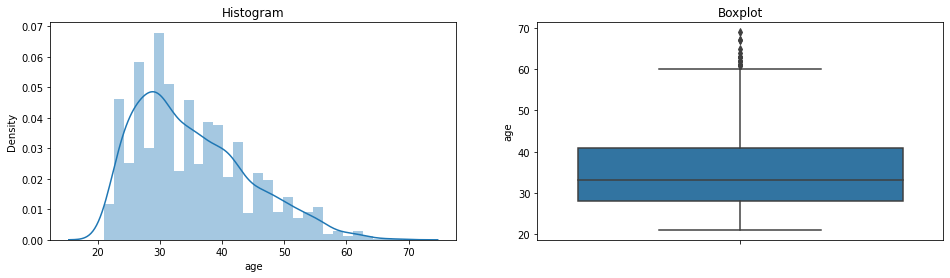

In [25]:
# distribusi dan boxplot age
print('Distribusi dan boxplot age sebelum capping')
print('mean dari age:', X_train['age'].mean())
distribusi_plot(X_train, 'age')

Dari boxplot, dalam kolom age terdapat outliers dan distribusinya right-skew oleh karena itu handle outliers menggunakan median imputation dengan metode capping. Kelebihan metode ini adalah tidak mengurasi data yang ada tetapi kelemahannya bisa merubah sedikit dari distibusi data awal. Perubahannya dapat dilihat dari nilai meannya.

In [26]:
# membuat capper dengan median imputation
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age'])

# fit data X-train
windsoriser.fit(X_train)

#transfoem data
X_train_handle = windsoriser.transform(X_train)

Distribusi dan boxplot age sebelum capping
mean dari age: 35.14742309228925


c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


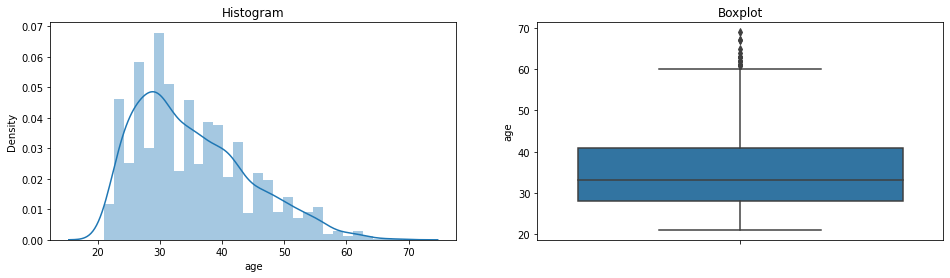

Distribusi dan boxplot age setelah capping
mean dari age: 35.12804634438674


c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


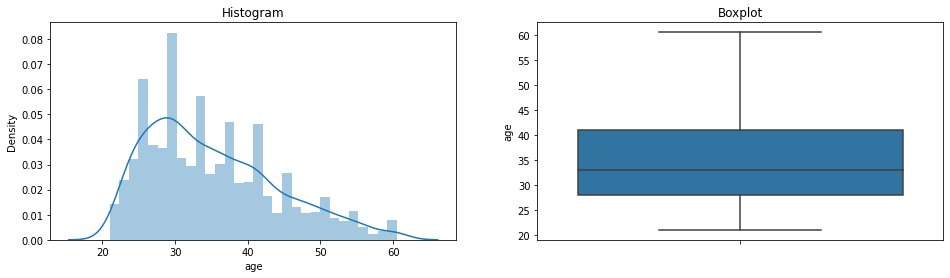

In [27]:
# sebelum capping
print('Distribusi dan boxplot age sebelum capping')
print('mean dari age:', X_train['age'].mean())
distribusi_plot(X_train, 'age')

# setelah capping
print('Distribusi dan boxplot age setelah capping')
print('mean dari age:', X_train_handle['age'].mean())
distribusi_plot(X_train_handle, 'age')

Setelah dilakukan capping nilai dari mean berubah dari 35.147 menjadi 35.128, walaupun sedikit nilai dari mean yang berubah tetapi tetap saja hal tersebut telah mengubah sedikit distribusi dari kolom age ini. tetapi tidak ada data yang hilang.

## 5.4 Feature Selection

Pada EDA mengenai hubungan korelasi antar fitur terdapat banyak fitur yang memiliki korelasi satu sama lain, artinya kolom antar fitur tidak saling independent dan hal ini dapat menyebabkan overfitting pada model train. Oleh karena itu diambil salah satu kolom yang memiliki korelasi dengan target dan yang lainnya didrop.

Fitur-fitur yang memiliki korelasi tinggi yaitu antara pay_0 sampai pay_6, bill_amt_1 sampai bill_amt_6 dan pay_amt_1 sampai pay_amt_6 jadi dari masing-masing kolom tersebut hanya akan diambil 1 fitur yang mewakili. Berdasarkan hasil heatmap bahwa dipilih pay_0, bill_amt_6 dan pay_amt_4.

In [28]:
# menampilkan semua kolom pada x-train
X_train_handle.columns

Index(['limit_balance', 'gender', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [29]:
# Drop Column yang tidak digunakan pada X-train
X_train_handle.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
                    'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
                    'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5','pay_amt_6'], axis=1, inplace=True)

In [30]:
# Drop Column yang tidak digunakan pada X-test
X_test.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
            'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5','pay_amt_6'], axis=1, inplace=True)

In [31]:
X_train_handle

,limit_balance,gender,education_level,marital_status,age,pay_0,bill_amt_6,pay_amt_4
2579,200000.0,2,1,1,41.0,-2.0,0.0,4680.0
1587,90000.0,1,2,1,47.0,0.0,300.0,0.0
1033,500000.0,1,1,1,48.0,0.0,120388.0,5000.0
1995,500000.0,2,1,1,34.0,-2.0,0.0,0.0
1023,20000.0,1,3,1,36.0,0.0,14218.0,701.0
...,...,...,...,...,...,...,...,...
1337,230000.0,1,3,2,24.0,0.0,73418.0,0.0
406,100000.0,1,2,2,28.0,0.0,1434.0,3786.0
1414,60000.0,2,2,2,23.0,0.0,30103.0,0.0
2191,310000.0,1,1,2,38.0,-2.0,995.0,1502.0


## 5.5 Feature Scaling

Feature scaling bertujuan untuk menyamakan range antar data. Misalnya range age dan limit balance yang sama-sama numerik tetapi dalam definisi 'nilai' yang berbeda maka dilakukan normalisasi range. Selain itu scaling bertujuan agar machine learning tidak bingung lagi dalam mempelajari range. Untuk dataset ini hanya perlu dilakukan scaling karena semua data telah berbentuk numerik. Scaling dapat menggunakan berbagai macam scaler, disini akan menggunakan MinMaxScaler untuk mengubah range data dari 0-1.

In [32]:
# definisikan scaler
scaler = MinMaxScaler()

In [33]:
# fit dan transform X-train
X_train_final = scaler.fit_transform(X_train_handle)

# transformX-test
X_test_final = scaler.transform(X_test)

In [34]:
# membuat X-train-final menjadi dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=['limit_balance', 'gender', 'education_level', 'marital_status', 'age',
                                                        'pay_0', 'bill_amt_6', 'pay_amt_4'])
X_train_final_df

,limit_balance,gender,education_level,marital_status,age,pay_0,bill_amt_6,pay_amt_4
0,0.240506,1.0,0.000000,0.333333,0.506329,0.0,0.144873,0.025347
1,0.101266,0.0,0.333333,0.333333,0.658228,0.2,0.145461,0.000000
2,0.620253,0.0,0.000000,0.333333,0.683544,0.2,0.380897,0.027080
3,0.620253,1.0,0.000000,0.333333,0.329114,0.0,0.144873,0.000000
4,0.012658,0.0,0.666667,0.333333,0.379747,0.2,0.172748,0.003797
...,...,...,...,...,...,...,...,...
2498,0.278481,0.0,0.666667,0.666667,0.075949,0.2,0.288811,0.000000
2499,0.113924,0.0,0.333333,0.666667,0.177215,0.2,0.147685,0.020505
2500,0.063291,1.0,0.333333,0.666667,0.050633,0.2,0.203891,0.000000
2501,0.379747,0.0,0.000000,0.666667,0.430380,0.0,0.146824,0.008135


Setelah data dilakukan scaling, data setalnjutnya sudah siap dimasukkan dalam model dan dilakukan prediksi.

# 6. Pembuatan Model

## 6.1 Model Logistic Regression

### 6.1.1 Model Definition

Model yang akan digunakan adalah logistic regression. Untuk memvalidasi model maka akan menggunakan cross validation dan untuk menemukan kombinasi paramater terbaik akan menggunakan gridsearch.

In [35]:
# definisikan model
model_logistic = LogisticRegression()

Validasi model algoritma menggunakan cross validation

In [36]:
# validasi dilakukan 5 kali
k_logistic=KFold(n_splits=5)

# cross validation
score_logistic = cross_val_score(model_logistic, X_train_final, y_train, cv=k_logistic)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_logistic))
print("rata-rata Cross Validation score :{}".format(score_logistic.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_logistic.std()))

Score 5 Cross Validation [0.82235529 0.79241517 0.82834331 0.774      0.838     ]
rata-rata Cross Validation score :0.8110227544910179
Standar deviasi Cross Validation score :0.023971343085059625


Diperoleh nilai validasi model dengan rata-rata 0.811 dan standar deviasi 0.024 artinya rentang akurasi dari model +- 2,4% dari nilai rata-rata akurasi yang diperoleh. Jika pada hasil train atau test memperoleh nilai akurasi model 0,787 - 0.835 berrati nilainya dapat dikatakan telah sesuai karena telah divalidasi sebanyak 5 kali.

Selanjutnya mencari kombinasi parameter yang paling bagus menggunakan Gridsearch.

In [37]:
# definisikan parameter yang akan diuji
param_logistic = {
                    'penalty': ['l1', 'l2', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                    'max_iter': [50, 100]
}

In [38]:
# gridseacrh dengan cross validation 5 kali
logistic_grid = GridSearchCV(model_logistic, param_logistic, cv=5, scoring='accuracy', return_train_score=True)

### 6.1.2 Model Training

Setelah mendefinisikan model maka model akan dilakuka training dan untuk mencari hyperparamter yang terbaik yang digunakan dari hasil gridsearch.

In [39]:
# Training model
logistic_grid.fit(X_train_final, y_train)

c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\sklearn\linear_model\_logistic.py", line 447,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100], 'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [40]:
# kombinasi paramter terbaik
print('best params:', logistic_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', logistic_grid.best_score_)


best params: {'max_iter': 50, 'penalty': 'none', 'solver': 'newton-cg'}
best score: 0.829012375249501


In [41]:
# definisikan estemator terbaik dengan model
logistic_best = logistic_grid.best_estimator_
print(logistic_best)

LogisticRegression(max_iter=50, penalty='none', solver='newton-cg')


dari gridsearch diperoleh kombinasi paramter untuk digunakan model yaitu solver newton-gc, tidak menggunakan penalty dan max iterasi 50 kali. Hasil ini akan digunakan untuk prediksi data train dan test

### 6.1.3 Model Evaluation

Setelah dilakukan training model dan menggunakan hyperparameter tunning, model akan melakukan prediksi pada data train dan test

In [42]:
# prediksi data train
y_pred_train_log = logistic_best.predict(X_train_final)
# prediksi data test
y_pred_test_log = logistic_best.predict(X_test_final)

Dilakukan evaluasi terhadapat perfoma dari model klasifikasi, evaluasi dapat dilihat akurasi, f1-score dan sebagainya.

pertama, evaluasi dari hasil confusion_matrix

In [43]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_log))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_log))

Hasil prediksi train-set
[[1910   54]
 [ 367  172]]

 Hasil prediksi test-set
[[340  11]
 [ 69  22]]


Nilai dari confusion matrix terdapat 4 pembagian yaitu True positif dan True Negatif (aktual dan prediksi sama), False positif dan False Negatif (aktual dan prediksi berbeda). Data diklasifikan dengan benar merupakan TP+TN/jumlah seluruh data sedangkan data yang klasifikasi salah merupakan FP+FN/jumlah keseluruhan data.

Untuk klasifikasi data train yang benar 1910 + 172/2503 = 0.83, data train yang salah 367+54/2503 = 0.17. Maka akurasi dari model adalah 83% karena model telah dapat mendapatkan hasil prediksi sesuai dengan aktualnya. 

Untuk klasifikasi data test yang benar 340 + 22/442 = 0.82, data train yang salah 69+11/442 = 0.18. Dapat dikatakan akurasi dari model adalah 82% karena model telah dapat mendapatkan hasil prediksi sesuai dengan aktualnya. 

Nilai akurasi dari confusion matrix ini akan sama dengan akurasi dengan classification report.

kedua, lihat dari classification_report

In [44]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_log))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_log))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1964
           1       0.76      0.32      0.45       539

    accuracy                           0.83      2503
   macro avg       0.80      0.65      0.68      2503
weighted avg       0.82      0.83      0.80      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       351
           1       0.67      0.24      0.35        91

    accuracy                           0.82       442
   macro avg       0.75      0.61      0.62       442
weighted avg       0.80      0.82      0.78       442



 Akurasi menunjukkan seberapa tepat model dalam mengklasifikasikan data, hasil akurasi dapat diperoleh dari TP+TN/jumlah keseluruhan data .Diperoleh akurasi dari model untuk data train 83% dan test 82% dimana model ini dapat dikatan cukup bagus karena dapat menempatkan klasifikasi dengan benar. Walaupun sudah cukup bagus tetapi model masih sedikit overfit dengan perbedaan 1% lebih tinggi untuk data train. Berdasarkan rentang nilai validasi nilai akurasi model 78,7 - 83,5% maka model akurasinya telah tervalidasi sesuai cross validation. 

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 90% sedangkan label 1 hanya 45% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 89% tetapi untuk label 1 hasilnya hanya 35%. F1-score digunakan karena nilai ini menunjukkan perbandingan rata-rata dari precision dan recall yang dibobotkan. 

### 6.1.4 Model Inference

Model logistic yang telah ditraining dan di test sebelumnya selanjutnya akan diuji menggunakan data inference, hasil dari prediksinya akan dibandingkan dengan hasil aktualnya.

In [45]:
# tampilkan data inference
data_inf

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


Lakukan feature selection, scaling dan mengubah dalam dataframe

In [46]:
# Drop Column untuk menyesuaikan model
data_inf_drop = data_inf.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
            'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
            'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_5','pay_amt_6', 'default_payment_next_month'], axis=1)

In [47]:
#scaling
data_inf_final = scaler.transform(data_inf_drop)

In [48]:
# Mempediksi data Inference
y_pred_inf_log = logistic_best.predict(data_inf_final)
y_pred_inf_log

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [49]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_log_df = pd.DataFrame(y_pred_inf_log, columns=['default payment-Prediction'])

# Gabungkan data Inference dengan kolom prediksi
data_inf_predic_log = pd.concat([data_inf, y_pred_inf_log_df], axis=1)
data_inf_predic_log

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default payment-Prediction
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1,0
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,0
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1,1


In [50]:
#tampilkan tabel aktual dan prediksi payment default
pd.concat([(data_inf['default_payment_next_month']), (y_pred_inf_log_df['default payment-Prediction'])], axis=1)

,default_payment_next_month,default payment-Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Setelah diterapkan pada data inference, dapat dilihat bahwa dari 20 prediksi data hanya terdapat 2 data yang hasil prediksinya berbeda dengan aslinya. 

## 6.2 Model SVM

### 6.2.1 Model Definition

Definisikan model svm dan lakukan cross validation sebelum dilakukan training model.

In [51]:
# definisikan model
model_svm = SVC()

Lakukan validasi model menggunakan cross validation

In [52]:
# validasi dilakukan 5 kali
k_svm = KFold(n_splits=5)

# cross validation
score_svm= cross_val_score(model_svm, X_train_final, y_train, cv=k_svm)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_svm))
print("rata-rata Cross Validation score :{}".format(score_svm.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_svm.std()))

Score 5 Cross Validation [0.82834331 0.81237525 0.84231537 0.766      0.844     ]
rata-rata Cross Validation score :0.8186067864271458
Standar deviasi Cross Validation score :0.02866362916029472


Rentang nilai akurasi dari model adalah 0.791 - 0.847 karena rata-rata dari cross validasinya 0.819 dan memiliki standar deviasi +- 0.028. Cross validasi ini dilakukan sebanyak 5 kali fold dan hasilnya diambil rata-ratanya.

Selanjutnya definisikan parameter dan akan digunakan gridsearch untuk mencari kombinasi paramter terbaik

In [53]:
# definisikan parameter yang akan diuji
param_svm = {
            'C': [0.01, 0.1, 1],
            'gamma': [0.01, 0.1, 1],
            'kernel': ['linear', 'rbf', 'sigmoid']
}

In [54]:
# gridseacrh dengan cross validation 5 kali
svm_grid = GridSearchCV(
                        model_svm, 
                        param_svm, 
                        cv=5, 
                        scoring='accuracy', 
                        return_train_score=True)

### 6.2.2 Model Training

Dilakukan training dan dipilih best parameter yang akan digunakan

In [55]:
# Training model
svm_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [56]:
# kombinasi paramter terbaik
print('best params:', svm_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', svm_grid.best_score_)

best params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.8034339321357287


In [57]:
# definisikan estemator terbaik dengan model
svm_best = svm_grid.best_estimator_
print(svm_best)

SVC(C=1, gamma=1)


Pada best parameter akan diguanakn nilai C dan gamma adalah 1.

### 6.2.3 Model Evaluation

Prediksi data train dan test menggunakan model SVM dengan menggunakan hyperpameter tunning.

In [58]:
# prediksi data train
y_pred_train_svm = svm_best.predict(X_train_final)
# prediksi data test
y_pred_test_svm = svm_best.predict(X_test_final)

Melihat hasil evaluasi model svm menggunakan confusion_matrix dan classification report

In [59]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svm))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svm))

Hasil prediksi train-set
[[1938   26]
 [ 428  111]]

 Hasil prediksi test-set
[[345   6]
 [ 79  12]]


Hasil dari confusion matrix untuk melihat berapa banyak data yang diklasifikasikan dengan benar dan salah.

Data train, klasifikasi yang benar 1938+111/2503 = 0.82 dari 1, klasifikasi yang salah 428+26/2503 = 0.18 dari 1. Maka aurasi data yang diprediksi telah sesuai sebesar 82 %.

Sedangkan untuk data test, klasifikasi yang benar 345+12/442 = 0.81 dari 1, klasifikasi yang salah 79+6/442 = 0.19 dari 1. Maka akurasi dari data yang dipreksi telah sesuai sebesar 81%.

In [60]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svm))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svm))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1964
           1       0.81      0.21      0.33       539

    accuracy                           0.82      2503
   macro avg       0.81      0.60      0.61      2503
weighted avg       0.82      0.82      0.77      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       351
           1       0.67      0.13      0.22        91

    accuracy                           0.81       442
   macro avg       0.74      0.56      0.56       442
weighted avg       0.78      0.81      0.75       442



Dari f1-score train dan test untuk label 0 memiliki nilai 0.90 dan 0.89 nilai sangat baik karena nilainya telah mendekati 1, tetapi untuk label 1 nilainya masih rendah yaitu 0.50 dan 0.41 dan masih sangat jauh dari 1. Berarti model masih underfitting dalam klasifikasi label 0.

Dari clasification report dapat dilihat akurasi dari train dan test telah sama dengan perhitungan dari confusion matrix diatas yaitu akurasi train 82% dan test 81%. 

Secara keseluruhan untuk hasil yang diperoleh model sudah baik tetapi masih overfitting karena nilai train 1% lebih tinggi dibandingkan dengan nilai test tetapi hasilnya dapat dikatakan baik dengan akurasi begitu dan telah sesuai dengan rentang nilai yang telah di validasi dari cross validation yang rentang 79.1 - 84.7%. 

### 6.2.4 Model Inference

Model SVM telah dilakukan training dan test, selanjutnya menguji model svm menggunakan data baru. data inference sebelumnya telah dilakukan scaling dan untuk model ini langsung dilakukan prediksi.

In [61]:
# Mempediksi data Inference
y_pred_inf_svm = svm_best.predict(data_inf_final)
y_pred_inf_svm

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [62]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_svm_df = pd.DataFrame(y_pred_inf_svm, columns=['default payment-Prediction SVM'])

# Gabungkan data Inference dengan kolom prediksi
data_inf_predic_svm = pd.concat([data_inf, y_pred_inf_svm_df], axis=1)

In [63]:
# tampilkan kolom default payment dan prediksi svm
data_inf_predic_svm[['default_payment_next_month', 'default payment-Prediction SVM']]

,default_payment_next_month,default payment-Prediction SVM
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Pada index baris 5, 6 dan 19 hasil prediksinya berbeda dari data sebenarnya karena model svm hanya memiliki akurasi model hingga 81% sehingga jika ada data pasti masih memiliki prediksi yang salah.

## 6.3 Model Random Forest

### 6.3.1 Model Definition

Pendefinisian model random forest dan menggunakan cross validation untuk menvalidasi akurasi dari model.

In [64]:
# definisikan model
model_rf = RandomForestClassifier()

In [65]:
# validasi dilakukan 5 kali
k_rf = KFold(n_splits=5)

# cross validation
score_rf = cross_val_score(model_rf, X_train_final, y_train, cv=k_rf)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_rf))
print("rata-rata Cross Validation score :{}".format(score_rf.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_rf.std()))

Score 5 Cross Validation [0.81237525 0.82634731 0.84830339 0.788      0.866     ]
rata-rata Cross Validation score :0.8282051896207584
Standar deviasi Cross Validation score :0.02721353152281113


Score cross validasi model adalah rata-rata 0.826 dan standar deviasi 0.03 artinya rentang akurasi dari model +- 3% dari nilai rata-rata akurasi yang diperoleh. Jika pada hasil train atau test memperoleh nilai akurasi model 0,795 - 0.856 berati nilainya dapat dikatakan telah sesuai.

Selanjutnya mencari kombinasi parameter yang paling baik menggunakan Gridsearch.

In [66]:
# paramter yang akan diuji
param_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7, 9]
}

In [67]:
# gridseacrh dengan cross validation 5 kali
rf_grid = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', return_train_score=True)

### 6.3.2 Model Training

Model random forest akan ditraining dan mencari best parameter yang akan digunakan untuk prediksi.

In [68]:
# Training model
rf_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 5, 7, 9]},
             return_train_score=True, scoring='accuracy')

In [69]:
# kombinasi paramter terbaik
print('best params:', rf_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', rf_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9}
best score: 0.8362035928143712


In [70]:
# definisikan estemator terbaik dengan model
rf_best = rf_grid.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=5, min_samples_split=9)


Kombinasi dari parameter (hyperparameter tuning) adalah menggunakan entropy dengan max depth 5 dan min sample split 9.

### 6.3.3 Model Evaluation

Evaluasi model random forest yang telah diperoleh.

In [71]:
# prediksi data train
y_pred_train_rf = rf_best.predict(X_train_final)
# prediksi data test
y_pred_test_rf = rf_best.predict(X_test_final)

Pertama, lihat confusion matrixnya

In [72]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_rf))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_rf))

Hasil prediksi train-set
[[1906   58]
 [ 342  197]]

 Hasil prediksi test-set
[[337  14]
 [ 64  27]]


Hasil dari confusion matrix untuk melihat berapa banyak data yang diklasifikasikan dengan benar dan salah.

Data train, klasifikasi yang benar 1910+197/2503 = 0.84 dari 1, klasifikasi yang salah 342+54/2503 = 0.16 dari 1. Maka aurasi data yang diprediksi telah sesuai sebesar 84 %.

Sedangkan untuk data test, klasifikasi yang benar 337+27/442 = 0.82 dari 1, klasifikasi yang salah 14+64/442 = 0.18 dari 1. Maka akurasi dari data yang dipreksi telah sesuai sebesar 82%.

Kedua, hasil evaluasi dari classification_report

In [73]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_rf))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1964
           1       0.77      0.37      0.50       539

    accuracy                           0.84      2503
   macro avg       0.81      0.67      0.70      2503
weighted avg       0.83      0.84      0.82      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       351
           1       0.66      0.30      0.41        91

    accuracy                           0.82       442
   macro avg       0.75      0.63      0.65       442
weighted avg       0.80      0.82      0.80       442



Dari clasification report dapat dilihat akurasi dari train dan test telah sama dengan perhitungan dari confusion matrix diatas. Dari f1-score train dan test untuk label 0 memiliki nilai 0.91 dan 0.90 nilai ini merupakan nilai yang sangat baik karena nilainya telah mendekati 1, tetapi untuk label 1 nilainya masih rendah yaitu 0.50 dan 0.41.

Secara keseluruhan untuk hasil yang diperoleh model sudah baik tetapi masih overfitting karena nilai train 2% lebih tinggi dibandingkan dengan nilai test. Akurasi dari model ini juga telah sesuai dengan rentang nilai yang telah di validasi dari cross validation yang rentang nilainya 79.5 - 85.6%

Dalam model Random forest terdapat fitur yang dapat melihat fitur important yang akan menghitung rata-rata pengurangan reduksi impurity yang dihasilkan oleh suatu fitur di seluruh pohon.

<function matplotlib.pyplot.show(close=None, block=None)>

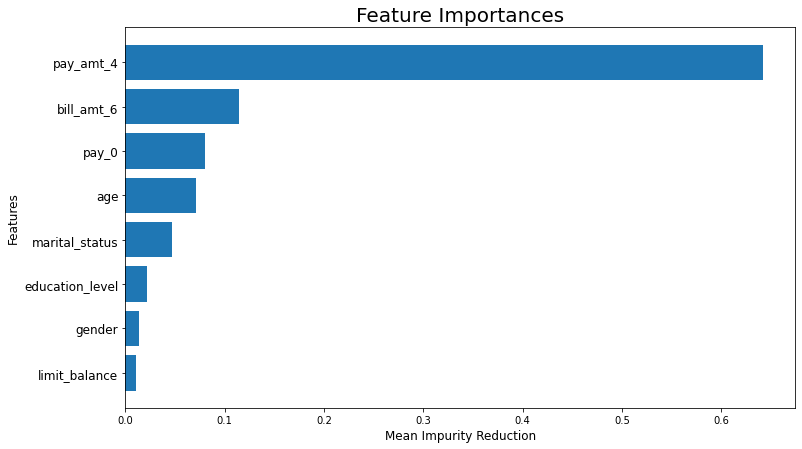

In [135]:
# fitur important
feature =  pd.Series(rf_best.feature_importances_, X_train_final_df.columns).sort_values(ascending = True)

# bar plot
plt.figure(figsize = (12,7))
plt.barh(X_train_final_df.columns, feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)
plt.show()

Setelah dicek dari feature important model random forest hasil yang diperoleh bahwa fitur pay_amt_4 yang paling tinggi membantu model untuk membedakan pembayaran default bulan selanjutntnya.

### 6.3.4 Model Inference

Model random forest akan digunakan untuk memprediksi dari data inference

In [75]:
# Mempediksi data Inference
y_pred_inf_rf = rf_best.predict(data_inf_final)
y_pred_inf_rf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [76]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_rf_df = pd.DataFrame(y_pred_inf_rf, columns=['default payment-Prediction RF'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic_rf = pd.concat([data_inf, y_pred_inf_rf_df], axis=1)

In [77]:
# tampilkan kolom income dan income prediksi
data_inf_predic_rf[['default_payment_next_month', 'default payment-Prediction RF']]

,default_payment_next_month,default payment-Prediction RF
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Daei 20 data inference, ada 2 data yang masih diprediksi salah oleh model, berarti 90% data telah diprediksi secara benar. Model random forest telah dapat memprediksi data baru yang terpisah dari dataset.

## 6.4 Model Decision Tree

### 6.4.1 Model definition

Definisikan model decision tree dan validasi nilai akurasi menggunakan cross validation

In [78]:
# definisikan model decision tree
model_dt = DecisionTreeClassifier()

In [79]:
# validasi dilakukan 5 kali
k_dt = KFold(n_splits=5)

# cross validation
score_dt = cross_val_score(model_dt, X_train_final, y_train, cv=k_dt)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_dt))
print("rata-rata Cross Validation score :{}".format(score_dt.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_dt.std()))

Score 5 Cross Validation [0.73253493 0.72055888 0.75449102 0.724      0.75      ]
rata-rata Cross Validation score :0.7363169660678643
Standar deviasi Cross Validation score :0.013651741536226203


Selanjutnya mencari kombinasi parameter yang paling baik menggunakan Gridsearch.

In [80]:
# paramter yang akan diuji
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7, 9]
}

In [81]:
# gridseacrh dengan cross validation 5 kali
dt_grid = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy', return_train_score=True)
dt_grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 5, 7, 9]},
             return_train_score=True, scoring='accuracy')

### 6.4.2 Model Training

Lakukan model training pada decision tree dengan masing-masing parameter yang ditentukan

In [82]:
# Training model
dt_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 5, 7, 9]},
             return_train_score=True, scoring='accuracy')

Mencari kombinasi paramter yang terbaik dan akan digunakan pada data test serta dievaluasi

In [83]:
# kombinasi paramter terbaik
print('best params:', dt_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
best score: 0.8366027944111776


Disini dari penggunaan hyperparameter tunning yang tepat telah menaikkan akurasi dari model. Pada hasil cross validation dengan model decision tree yang tidak diatur parameternya mendapatkan hasil rata-rata 0.728 sedangkan menggunakan hyperparameter tunning menjadi 0.837.

In [84]:
# definisikan estemator terbaik dengan model
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


mengecek kembali hasil cross validation setelah menggunakan hyperparameter tunning

In [85]:
# cross validation
score_dt_best = cross_val_score(dt_best, X_train_final, y_train, cv=k_dt)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_dt_best))
print("rata-rata Cross Validation score :{}".format(score_dt_best.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_dt_best.std()))

Score 5 Cross Validation [0.8243513  0.82634731 0.85828343 0.804      0.87      ]
rata-rata Cross Validation score :0.8365964071856288
Standar deviasi Cross Validation score :0.024098297325584946


setelah menggunakan hyperparameter tunning yang tepat telah menaikkan nilai akurasi dari model. Diperoleh nilai rata-rata 0.836 dengan rentang nilai yang diterima 0.812 - 0.86 karena standar deviasinya +- 0.024. Jadi jika hasil train dan test pada saat evaluasi model pada rentang tersebut dapat dikatakan hasil prediksi telah sesuai dengan akurasi model.

### 6.4.3 Model Evaluation

Evaluasi model Decision tree yang dibuat dengan hyperparameter tunning yang dipilih.

In [86]:
# prediksi data train
y_pred_train_dt = dt_best.predict(X_train_final)
# prediksi data test
y_pred_test_dt = dt_best.predict(X_test_final)

Evaluasi dapat dilihat dari nilai confusion matrix dan classification report nya.

In [87]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt))

Hasil prediksi train-set
[[1904   60]
 [ 343  196]]

 Hasil prediksi test-set
[[337  14]
 [ 65  26]]


Hasil dari confusion matrix untuk melihat berapa banyak data yang diklasifikasikan dengan benar dan salah.

Data train, klasifikasi yang benar 1904+196/2503 = 0.84 dari 1, klasifikasi yang salah 343+60/2503 = 0.16 dari 1. Maka aurasi data yang diprediksi telah sesuai sebesar 84 %.

Sedangkan untuk data test, klasifikasi yang benar 337+26/442 = 0.82 dari 1, klasifikasi yang salah 14+66/442 = 0.18 dari 1. Maka akurasi dari data yang dipreksi telah sesuai sebesar 82%.

In [88]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1964
           1       0.77      0.36      0.49       539

    accuracy                           0.84      2503
   macro avg       0.81      0.67      0.70      2503
weighted avg       0.83      0.84      0.82      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       351
           1       0.65      0.29      0.40        91

    accuracy                           0.82       442
   macro avg       0.74      0.62      0.65       442
weighted avg       0.80      0.82      0.79       442



Dari clasification report dapat dilihat akurasi dari train dan test telah sama dengan perhitungan dari confusion matrix diatas. Dari f1-score train dan test untuk label 0 memiliki nilai 0.90 nilai ini merupakan nilai yang sangat baik karena nilainya telah mendekati 1, tetapi untuk label 1 nilainya masih rendah yaitu 0.47 dan 0.40 hal ini dapat diakibatkan karena untuk label ini datanya sedikit jadi model belajar sedikit juga.

Secara keseluruhan untuk hasil yang diperoleh model sudah baik tetapi masih overfitting karena nilai train 2% lebih tinggi dibandingkan dengan nilai test. Akurasi dari model ini juga telah sesuai dengan rentang nilai yang telah di validasi dari cross validation yang rentang nilainya 81.2 - 86%

Pada model decision tree dapat dilihat pentingnya penggunaan hyperparameter yang tepat, dapat dilihat peningkatan akurasi yang lumayan jauh yang awalnya hanya 73% menjadi 82-84%.

### 6.4.4 Model Inference

Menggunakan model decision tree dalam model inference

In [89]:
# Mempediksi data Inference
y_pred_inf_dt = dt_best.predict(data_inf_final)
y_pred_inf_dt

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [90]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_dt_df = pd.DataFrame(y_pred_inf_dt, columns=['default payment-Prediction DT'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic_dt = pd.concat([data_inf, y_pred_inf_dt_df], axis=1)

In [91]:
# tampilkan kolom income dan income prediksi
data_inf_predic_dt[['default_payment_next_month', 'default payment-Prediction DT']]

,default_payment_next_month,default payment-Prediction DT
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Pada index 5 dan 6 nilai hasil prediksi berbda denga nilai yang sebenarnya. Hal ini dapat disebabkan akurasi dari model hanya sekitar 82% jadi masih ada hasil prediksi yang salah.

## 6.5 Model KNN

### 6.5.1 Model Definition

Definisikan model KNN yang akan diguanakan dan validasi akurasinya mengguanakan cross validation

In [92]:
# definisikan model KNN
model_knn = KNeighborsClassifier()

In [93]:
# validasi dilakukan 5 kali
k_knn = KFold(n_splits=5)

# cross validation
score_knn = cross_val_score(model_knn, X_train_final, y_train, cv=k_knn)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_knn))
print("rata-rata Cross Validation score :{}".format(score_knn.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_knn.std()))

Score 5 Cross Validation [0.80439122 0.79640719 0.83033932 0.754      0.834     ]
rata-rata Cross Validation score :0.8038275449101796
Standar deviasi Cross Validation score :0.028814631793697316


Rentang akurasi dari model KNN adalah 0.776 - 0.832 dengan rata-rata validasi akurasi 0.803

Definisikan paramter yang akan dikombinasikan

In [94]:
# paramter yang akan diuji
param_knn = {
    'n_neighbors': [2,3,4,5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'],
    'leaf_size': [10, 20, 30]
}

Mencari kombinasi parameter terbaik menggunakan grisearch

In [95]:
# gridseacrh dengan cross validation 5 kali
knn_grid = GridSearchCV(model_knn, param_knn, cv=5, scoring='accuracy', return_train_score=True)
knn_grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [10, 20, 30], 'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

### 6.5.2 Model Training

Dilakukan training model dan akan dilakukan pencarian parameter terbaik.

In [96]:
# Training model
knn_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [10, 20, 30], 'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [97]:
# kombinasi paramter terbaik
print('best params:', knn_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', knn_grid.best_score_)

best params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'uniform'}
best score: 0.8046339321357285


In [98]:
# definisikan estemator terbaik dengan model
knn_best = knn_grid.best_estimator_
print(knn_best)

KNeighborsClassifier(leaf_size=10, n_neighbors=4)


jadi hyperparameter tuning yang akan digunakan dalam KNN model dengan neighbors 4 dan leaf size 10.

### 6.5.3 Model Evaluation

Prediksi data train dan test dengan model KNN

Evaluasi model KNN dengan hyperparameter tunning yang diperoleh menggunakan classification report dan confusion matrix

In [99]:
# prediksi data train
y_pred_train_knn = knn_best.predict(X_train_final)
# prediksi data test
y_pred_test_knn = knn_best.predict(X_test_final)

In [100]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[1936   28]
 [ 374  165]]

 Hasil prediksi test-set
[[340  11]
 [ 76  15]]


Hasil dari confusion matrix untuk melihat berapa banyak data yang diklasifikasikan dengan benar dan salah.

Data train, klasifikasi yang benar 1936+165/2503 = 0.84 dari 1, klasifikasi yang salah 347+28/2503 = 0.16 dari 1. Maka aurasi data yang diprediksi telah sesuai sebesar 84 %.

Sedangkan untuk data test, klasifikasi yang benar 340+15/442 = 0.80 dari 1, klasifikasi yang salah 76+15/442 = 0.20 dari 1. Maka akurasi dari data yang dipreksi telah sesuai sebesar 80%.

In [101]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1964
           1       0.85      0.31      0.45       539

    accuracy                           0.84      2503
   macro avg       0.85      0.65      0.68      2503
weighted avg       0.84      0.84      0.81      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       351
           1       0.58      0.16      0.26        91

    accuracy                           0.80       442
   macro avg       0.70      0.57      0.57       442
weighted avg       0.77      0.80      0.76       442



Dari clasification report dapat dilihat akurasi dari train dan test telah sama dengan perhitungan dari confusion matrix diatas. Dari f1-score train dan test untuk label 0 memiliki nilai 0.91 dan 0.89 nilai ini merupakan nilai yang sangat baik karena nilainya telah mendekati 1, tetapi untuk label 1 nilainya masih rendah yaitu 0.45 dan 0.26 hal ini dapat diakibatkan karena untuk label ini datanya sedikit jadi model belajar sedikit juga.

Secara keseluruhan untuk hasil yang diperoleh model overfitting karena nilai train 4% lebih tinggi dibandingkan dengan nilai test. Akurasi dari model ini untuk nilai train melewati batasan dari cross validation, untuk test telah masuk pada rentang nilai tersebut. Overfitting ini bisa terjadi karena model terlalu banyak mendetailkan dan tidak dapat digunakan pada data test.

Meskipun telah menggunakan hyperparamter tunning tetapi masih saja overfit, hal ini bisa saja ada data yang ada di train dan tidak ada di data test. karena hyperparamter tunning diaplikasikan pertama kali pada data train saja.

### 6.5.4 Model Inference

Prediksi data inferece menggunakan model KNN

In [102]:
# Mempediksi data Inference
y_pred_inf_knn = knn_best.predict(data_inf_final)
y_pred_inf_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [103]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_dt_knn = pd.DataFrame(y_pred_inf_knn, columns=['default payment-Prediction KNN'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic_knn = pd.concat([data_inf, y_pred_inf_dt_knn], axis=1)

In [104]:
# tampilkan kolom income dan income prediksi
data_inf_predic_knn[['default_payment_next_month', 'default payment-Prediction KNN']]

,default_payment_next_month,default payment-Prediction KNN
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Ada 3 data yang memiliki hasil prediksi yang berbeda dari aktual yaitu baris index 1,5,6 berarti model dapat memprediksi nilai yang benar dari 20 data ada 17 yang benar = 85%. Model KNN dapat mempredeksi data baru dengan akurasi yang mirip dengan hasil train dan test (berbeda tetapi tidak terlalu jauh).

## 6.6 Model Naive Bayes

### 6.6.1 Model Definition

Definisikan model Naive Bayes tanpa menggunakan hyperparameter

In [105]:
# definisikan model baive bayes
model_nb = GaussianNB()

Validasi akurasi model menggunalan cross validation

In [106]:
# validasi dilakukan 5 kali
k_nb = KFold(n_splits=5)

# cross validation
score_nb = cross_val_score(model_nb, X_train_final, y_train, cv=k_nb)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_nb))
print("rata-rata Cross Validation score :{}".format(score_nb.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_nb.std()))

Score 5 Cross Validation [0.82235529 0.82834331 0.85828343 0.804      0.87      ]
rata-rata Cross Validation score :0.8365964071856288
Standar deviasi Cross Validation score :0.02416433678564653


Rentang akurasi yang tervalidasi antara 0.812 - 0.859, jadi jika nilai evaluasi model terdapat rentang ini berarti akurasinya dapat dipercaya.

Mencari parameter terbaik dan akan digunakan dalam model naive bayes

In [107]:
# definisikan paramater
param_nb = {'var_smoothing' : [0.01, 0.1, 1]}

Menggunakan grid search untuk menentukan paramater terbaik

In [108]:
# gridseacrh dengan cross validation 5 kali
nb_grid = GridSearchCV(model_nb, param_nb, cv=5, scoring='accuracy', return_train_score=True)
nb_grid

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

### 6.6.2 Model Training

Training model naive bayes dengan dan akan mencari hyperparamter tunning yang tepat

In [109]:
# Training model
nb_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [110]:
# kombinasi paramter terbaik
print('best params:', nb_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', nb_grid.best_score_)

best params: {'var_smoothing': 0.01}
best score: 0.8350075848303394


In [111]:
# definisikan estemator terbaik dengan model
nb_best = nb_grid.best_estimator_
print(nb_best)

GaussianNB(var_smoothing=0.01)


Dengan menggunakan var_smooting 0.01 model naive bayes akan dilakukan prediksi

### 6.6.3 Model Evaluation

Prediksi data train dan test menggunakan naive bayes dengan hyperparamter

In [112]:
# prediksi data train
y_pred_train_nb = nb_best.predict(X_train_final)
# prediksi data test
y_pred_test_nb = nb_best.predict(X_test_final)

Evaluasi model menggunakan confusion matrix dan clasification report

In [113]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_nb))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_nb))

Hasil prediksi train-set
[[1907   57]
 [ 361  178]]

 Hasil prediksi test-set
[[340  11]
 [ 65  26]]


Dari hasil confusion matrix data yang train yang diklasifikan secara benar ada 1907+178/2503 = 0.83 dari 1 dan yang masih diklasifikan salah ada 361+57/2503 = 0.17 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk model train adalah 83%. Untuk Data test juga memiliki nilai yang sama yaitu 83%.

In [114]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_nb))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_nb))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1964
           1       0.76      0.33      0.46       539

    accuracy                           0.83      2503
   macro avg       0.80      0.65      0.68      2503
weighted avg       0.82      0.83      0.81      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       351
           1       0.70      0.29      0.41        91

    accuracy                           0.83       442
   macro avg       0.77      0.63      0.65       442
weighted avg       0.81      0.83      0.80       442



Hasil f1-score weighted avg (rata-rata pembobotan) hasil yang diperoleh untuk nilai train dan test cukup baik yaitu 80-81%. tetapi jika dilihat dari masing-masing label hanya label 0 yang memiliki nilai f1-score yang baik sedangkan untuk label 1 nilainya masih jelek.

Untuk nilai akurasi sudah cukup baik mencapai 83% dan model tidak mengalami overfit karena hasil train dan test sama. Nilai akurasi ini juga telah dibuktikan pada perhitungan confusion matrix diatas serta telah divalidasi menggunakan cross validation sebanyak 5 kali.

Dari semua model, model naive bayes ini yang menunjukkan nilai terbaik karena nilai hasil train dan test tidak mengalami overfit dan dari nilai f1-score cukup baik.

### 6.6.4 Model Inference

prediksi data inferece menggunakan model naive bayes

In [115]:
# Mempediksi data Inference
y_pred_inf_nb = nb_best.predict(data_inf_final)
y_pred_inf_nb

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [116]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_nb_df = pd.DataFrame(y_pred_inf_nb, columns=['default payment-Prediction NB'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic_nb = pd.concat([data_inf, y_pred_inf_nb_df], axis=1)

In [117]:
# tampilkan kolom income dan income prediksi
data_inf_predic_nb[['default_payment_next_month', 'default payment-Prediction NB']]

,default_payment_next_month,default payment-Prediction NB
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


Data dari model inferece juga memiliki 2 kesalahan data dalam prediksinya menggunakan model naive bayes.

## 6.7 Model Adaboost

### 6.7.1 Model Definition

In [118]:
# definisikan model
model_ada = AdaBoostClassifier()

Gunakan cross validation untukmenvalidasi nilai akurasi dari model

In [119]:
# validasi dilakukan 5 kali
k_ada = KFold(n_splits=5)

# cross validation
score_ada = cross_val_score(model_ada, X_train_final, y_train, cv=k_ada)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_ada))
print("rata-rata Cross Validation score :{}".format(score_ada.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_ada.std()))

Score 5 Cross Validation [0.82235529 0.81836327 0.8502994  0.798      0.866     ]
rata-rata Cross Validation score :0.8310035928143712
Standar deviasi Cross Validation score :0.024169752588132816


Nilai akurasi yang tervalidasi ada pada rentang 0.806 - 0.854 dan telah dilakukan validasi sebanyak 5 kali.

Mencari hyperparameter tunning yang tepat untuk model adaboost

In [120]:
# definisikan paramater
param_ada = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
}

In [121]:
# gridseacrh dengan cross validation 5 kali
ada_grid = GridSearchCV(model_ada, param_ada, cv=5, scoring='accuracy', return_train_score=True)
ada_grid

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

### 6.7.2 Model Training

Training model adaboost dan setelahnya akan dicari hyperparamternya

In [122]:
# Training model
ada_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

In [123]:
# kombinasi paramter terbaik
print('best params:', ada_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', ada_grid.best_score_)

best params: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
best score: 0.8378011976047904


In [124]:
# definisikan estemator terbaik dengan model
ada_best = ada_grid.best_estimator_
print(ada_best)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01)


Untuk model adaboost akan menggunakan hyperparameter tunning dengan algoritma SAMME dan learning rate 0.01

### 6.7.3 Model Evaluation

Lakukan prediksi terhadap data train dan test menggunakan model adaboost

In [125]:
# prediksi data train
y_pred_train_ada = ada_best.predict(X_train_final)
# prediksi data test
y_pred_test_ada = ada_best.predict(X_test_final)

Evaluasi hasil akurasi, f1-score untuk mengetahui tingkat sebaik apa model telah dapat memprediksi data. Evaluasi bisa menggunakan confusion matrix dan classification report.

In [126]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_ada))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_ada))

Hasil prediksi train-set
[[1900   64]
 [ 342  197]]

 Hasil prediksi test-set
[[336  15]
 [ 64  27]]


Dari confusion matrix kita bisa menghitung jumlah klasifikasi yang benar dan masih salah. Menghitung data yang telah diklasifikasikan dengan benar dengan cara TP+TN/jumlah keseluruhan data. Data yang benar ini menunjukkan seberapa besar akurasi dari model, semakin besar nilainya atau mendekati 100% maka model dapat dikatakan semakin baik.

Dari data train 1900+197/2503 = 0.84 berarti akurasi mencapai 84% sedangkan untuk data test 336+27/442= 0.82 berarti 82%. Hasil ini menunjukkan model telah memiliki akurasi yang baik. hasil akurasi ini akan sama pada accuracy pada classification report.

In [127]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_ada))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_ada))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1964
           1       0.75      0.37      0.49       539

    accuracy                           0.84      2503
   macro avg       0.80      0.67      0.70      2503
weighted avg       0.83      0.84      0.81      2503


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       351
           1       0.64      0.30      0.41        91

    accuracy                           0.82       442
   macro avg       0.74      0.63      0.65       442
weighted avg       0.80      0.82      0.79       442



Dari clasification report hasil akurasi yang diperoleh dari train (84%) dan test (82%) masih memiliki perbedaan 2% jadi model overfit sedikit. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik. 

### 6.7.4 Model Inferece

prediksi data inferece menggunakan model adaboost

In [128]:
# Mempediksi data Inference
y_pred_inf_ada = ada_best.predict(data_inf_final)
y_pred_inf_ada

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [129]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_ada_df = pd.DataFrame(y_pred_inf_ada, columns=['default payment-Prediction AB'])

# Gabungkan data Inference dengan kolom prekdiksi
data_inf_predic_ada = pd.concat([data_inf, y_pred_inf_ada_df], axis=1)

In [130]:
# tampilkan kolom income dan income prediksi
data_inf_predic_ada[['default_payment_next_month', 'default payment-Prediction AB']]

,default_payment_next_month,default payment-Prediction AB
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,1


hasilnya, data pada index 5 dan 6 masih salah dalam prediksi data karena akurasi model hanya 83% jadi wajar jika ada salah dalam klasifikasi.

# 7. Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

    criterion merupakan parameter pada decision tree yang digunakan untuk memisasahkan node. salah satunya adalah information gain yang cara kerjanya mengitung perbedaan semua entropi sebelum dilakukan splitting dan criterion ini sifatnya bias terhadap fitur yang memiliki jumlah nilai yang besar. cara memilih fitur yang memiliki nilai entropy tertinggi.

2. Apakah fungsi dari pruning pada Tree model?

    pruning pada tree model berguna untuk mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Hal ini dilakkukan untuk menghindari overfitting dan model terlalu memperhatikan detail dari data tetapi tidak mengenal secara general.

3. Bagaimana cara memilih K yang optimal pada KNN?

    Sebenarnya pemilihan nilai k ini bersifat subjektif, tetapi lebih baik menggunakan jumlah yang ganjil agar voting yang dilakukan tidak seimbang dan mudah untuk menentukan hasil dari KNN itu sendiri. Jika masih bingung memiliki k dapat menggunakan gridsearch untuk parameter yang ditemukan (hyperparameter tunning).

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

    Cross validation (cv) merupakan metode yang digunakan untuk mavalidasi kinerja dari suatu model. Banyaknya validasi yang dilakukan sesuai dengan nilai k-fold yang disetting, misal menggunakan nilai k-fold=5 maka cv akan menvalidasi model sebanyak 5 kali dengan cara membagi-bagi data secara seimbang kedalam 5 fold. Hasil akhirnya dapat dilihat dari nilai rata-ratanya.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

    - accuracy, merupakan nilai seberapa baik model dalam memprediksikan klasifikasi secara benar (prediksi dan aktual sama).akurasi ini dapat diperoleh dari nilai TP+TN/jumlah keseluruhan data.
    - precision merupakan perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. 
    - recall merupakan perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif.
    - f1-score merupakan hasil rata-rata dari precison dan recall yang dibobotkan. jika f1-Score mendekati 1 maka model klasifikasi kita punya precision dan recall yang baik.

# 8. Kesimpulan

Diberikan dataset `credit card default` untuk melakukan prediksi klasifikasi dari default payment next month. Dataset ini teridri dari 24 kolom dan 2965 baris. Semua kolom bertipe numrik, tetapi ada beberpa jenis kolom yang bertipe numrik yang mewakilkan kategori.

Dari heatmap diperoleh banyak fitur yang saling berkorelasi, oleh karena itu fitur hanya dipilih yang memiliki paling besar dengan target. Tujuan menghapus fitur yang saling berkorelasi untuk menghindari adanya overfit pada model yaitu model terlalu mempelajari detail data. Dalam dataset jumlah label 1 dan 0 memilki jumlah yang imbalance. dari hasil heatmap fitur pay_0 (pembayaran bulan september) yang memiliki pengaruh yang paling besar terhadap target.

Sebelum data diprediksi terlebih dahulu memisahkan data sebagai data train (pembelajaran) dan data test (ujian). Setelah itu dilakukan scaling agar semua range data sama karena model yang digunakan berbasis perhitungan jarak.

Telah dibuat 7 model klasifikasi yang berbeda dan hasil akurasi yang hampir sama.
- Model Logistic regresion, untuk data train: 83% dan test: 82%.
- Model SVM, untuk data train: 82% dan test: 81%.
- Model Random Forest, untuk data train: 84% dan test: 82%
- Model Decison Tree, untuk data train: 84% dan test: 82%
- Model KNN, untuk data train: 84% dan test: 80%
- Model Naive Bayes, untuk data train dan test: 83%
- Model Adaboost, untuk data train: 84% dan test: 82%

Dari hasil diatas, dapat disimpulkan bahwa model yang terbaik adalah naive bayes dengan akurasi 83%. Walaupun ada model yang memiliki akurasi yang lebih tinggi tetapi model tersebut masih overfitting terhadap train testnya sedangkan untuk naive bayes hasil train dan testnya sama. Hasil ini telah dilakukan validasi sebanyak 5 kali menggunkan cross validation.

Untuk nilai f1-score, label 0 dari semua model memiliki nilai berkisar 0.89-0.91 karena memiliki banyak data sedangkan data label 0 memilii score yang masih rendah 0.22-0.50 karena kurangnya data yang tersedia. Sedangkan nilai f1-score weight avg (rata-rata) nilainya berkisar 0.80 dari keseluruhan model.

Untuk setiap model juga dilakukan hyperparamter tuning yang berfungsi untuk melakukan improve pada akurasi model. Hasil ini dapat dilihat pada model Decison tree yang sebelum dilakukan hyperparameter tuning hanya memiliki akurasi 73% dan setelah mecapai 83%. Berarti menggunakan parameter yang tepat meningkatkan akurasi model hingga 10%.

Dalam model Random forest terdapat perhitungan untuk mengukur feature importances dan hasil yang diperoleh fitur pay_amt_4 (pembayaran sebekumnya bulan juli) yang memiliki score tertinggi dalam membantu model membedakan apakah customer memiliki pembayaran default bulan selanjutnya.

Setelah model ditraining dan dievaluasi model digunakan untuk data inferece atau data baru, dari setiap model telah berhasil memprediksi sesuai dengan nilai aktualnya adalah 17-18 dari 20 data.

Secara keseluruhan model yang digunakan telah memiliki akurasi yang baik, untuk kedepannya mungkin lebih diperhatikan jumlah data setiap label atau mengatur datanya agar tidak imbalance.